<a href="https://colab.research.google.com/github/santhoshreddy39/Ineuron-ML-DL-Solutions/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**                                                           
I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

**Dataset**                                                                     
The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

**Description of Variables**                                                    
The dataset contains 6366 observations of 9 variables:

* rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
* age: woman's age
* yrs_married: number of years married
* children: number of children
* religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
* educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
* occupation: woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
* occupation_husb: husband's occupation (same coding as above)
* affairs: time spent in extra-marital affairs

In [2]:
# Data analysis and wrangling
import numpy as np     # Linear algebra
import pandas as pd    # File read & write operation

# Visualization
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pickle
from patsy import dmatrices

# Machine Learning 
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dta =sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
dta.shape

(6366, 9)

In [5]:
# add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs >0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [6]:
dta.info()      # Summary of data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [7]:
dta.isnull().sum()           # Finding the count of missing values from each column

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [8]:
# Summarizing the data to see distribution
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


It seems that there are no missing values in our data. Great, let's see the distribution of data:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

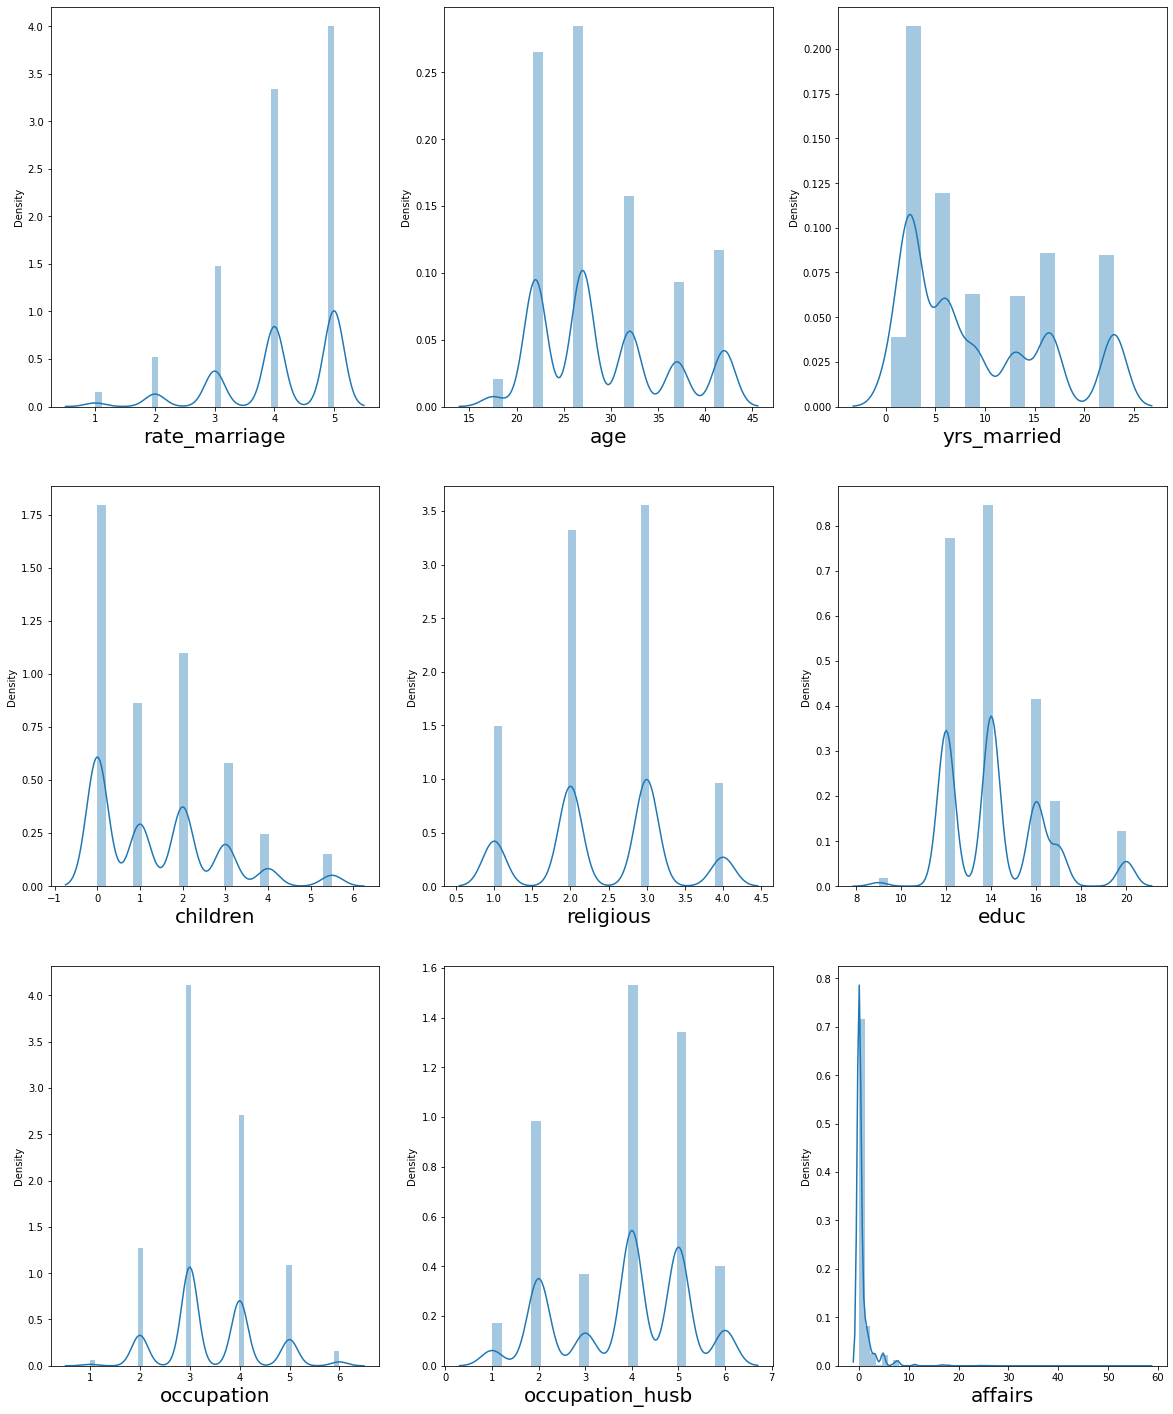

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in dta:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(dta[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

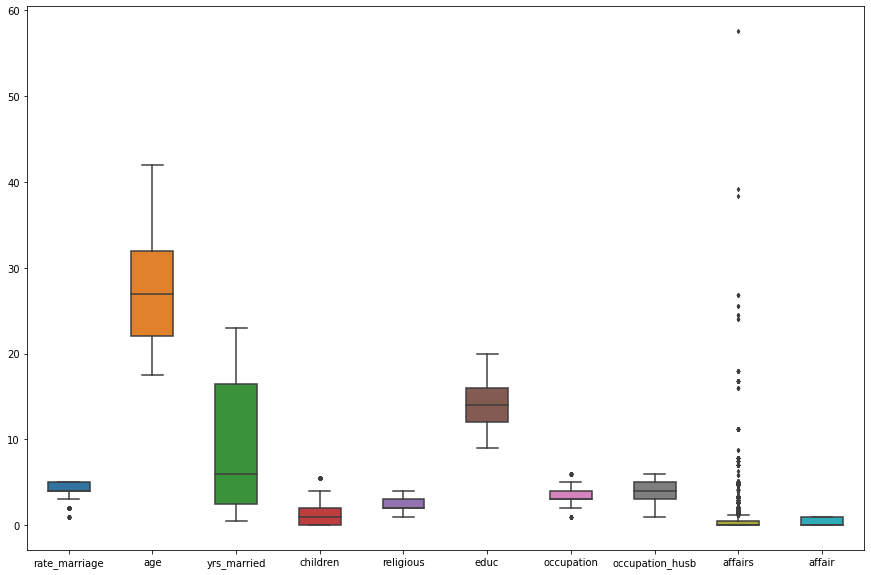

In [10]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=dta,width=0.5,ax=ax,fliersize=3)

[Text(0.5, 1.0, 'Marriage Rating')]

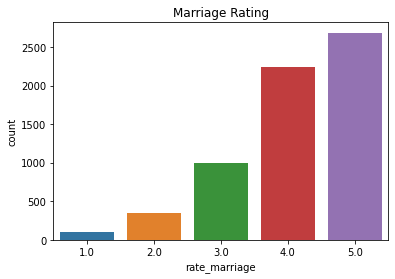

In [11]:
sns.countplot(x=dta['rate_marriage']).set(title='Marriage Rating')

[Text(0.5, 1.0, 'Womens Age')]

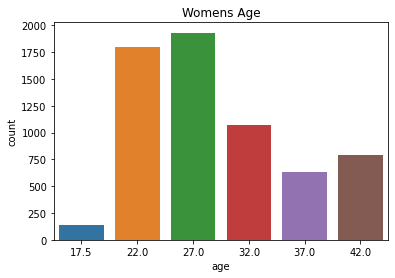

In [12]:
sns.countplot(x=dta['age']).set(title='Womens Age')

[Text(0.5, 1.0, 'Years of marriage')]

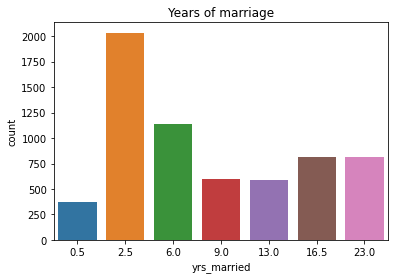

In [13]:
sns.countplot(x=dta['yrs_married']).set(title='Years of marriage')

[Text(0.5, 1.0, 'Number of children')]

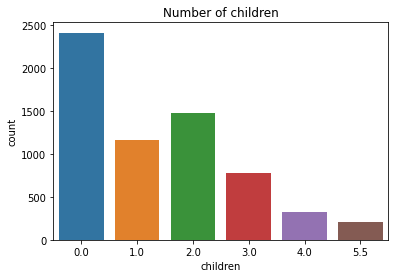

In [14]:
sns.countplot(x=dta['children']).set(title='Number of children')

[Text(0.5, 1.0, 'Religious')]

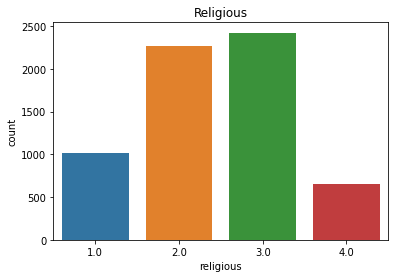

In [15]:
sns.countplot(x=dta['religious']).set(title='Religious')

[Text(0.5, 1.0, 'Education')]

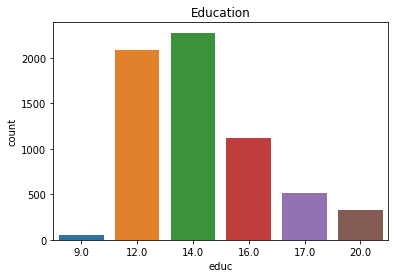

In [16]:
sns.countplot(x=dta['educ']).set(title='Education')

[Text(0.5, 1.0, 'Occupation of Women')]

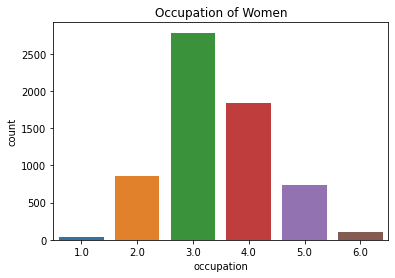

In [17]:
sns.countplot(x=dta['occupation']).set(title='Occupation of Women')

[Text(0.5, 1.0, 'Occupation of husband')]

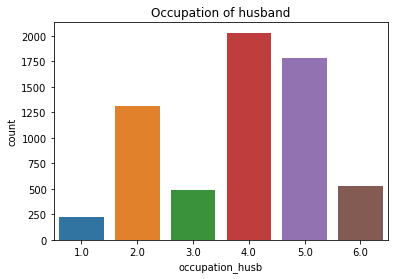

In [18]:
sns.countplot(x=dta['occupation_husb']).set(title='Occupation of husband')

[Text(0.5, 1.0, 'Number of affairs women having')]

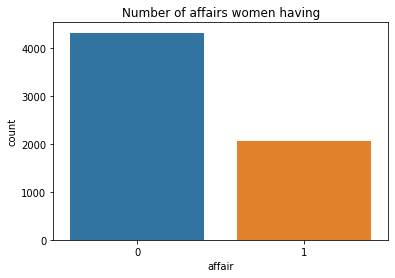

In [19]:
sns.countplot(x=dta['affair']).set(title='Number of affairs women having')

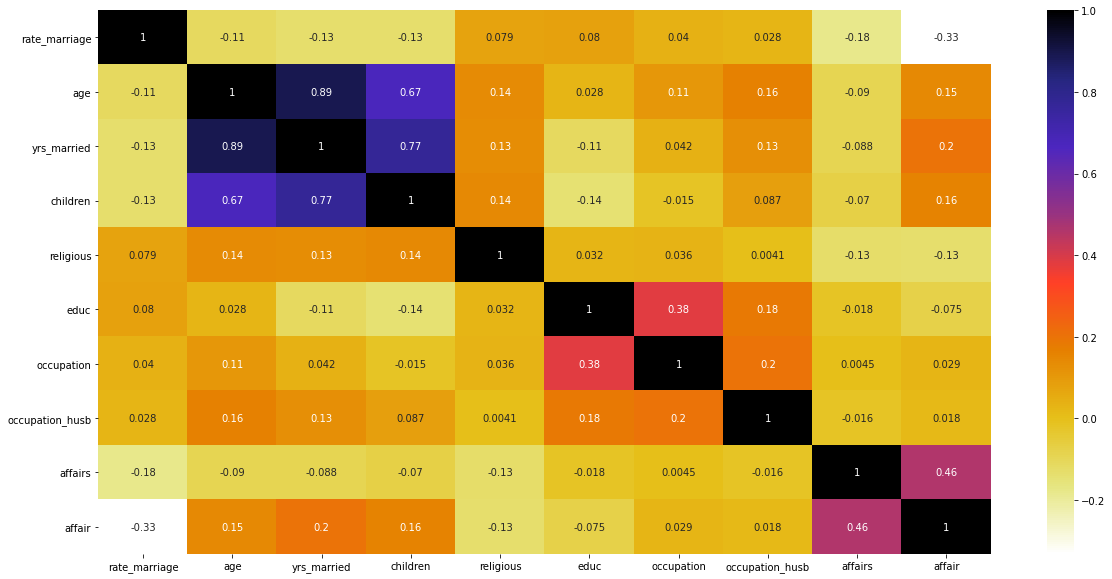

In [20]:
# Pearson Correlation
plt.figure(figsize=(20,10))
sns.heatmap(dta.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

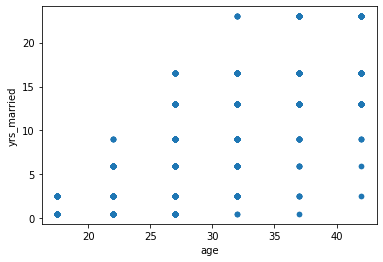

In [23]:
dta.plot(kind='scatter',x='age',y='yrs_married')

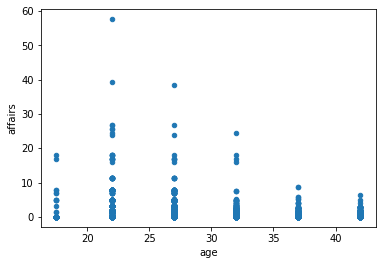

In [24]:
dta.plot(kind='scatter',x='age',y='affairs')

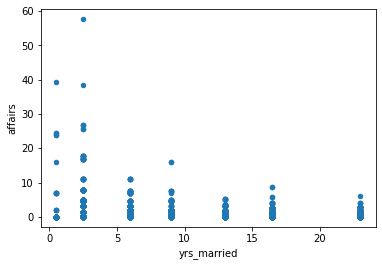

In [25]:
dta.plot(kind='scatter',x='yrs_married',y='affairs')

<Figure size 720x720 with 0 Axes>

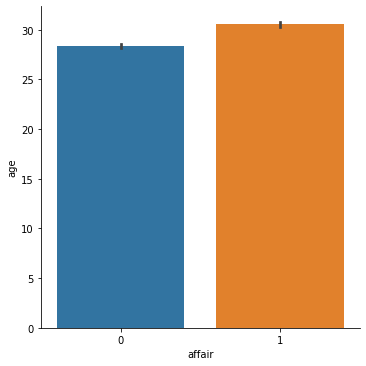

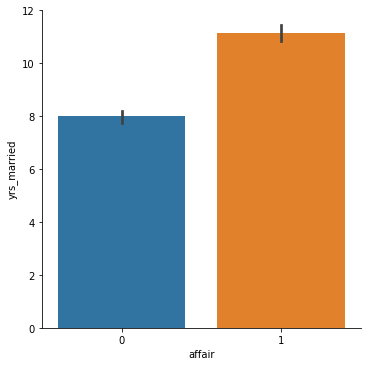

In [26]:
plt.figure(figsize=(10,10))
sns.catplot(x='affair',y='age',kind='bar',data=dta)
sns.catplot(x='affair',y='yrs_married',kind='bar',data=dta)
plt.show()

from the above two graphs, we understood that there is a similar relationship between the dependent feature (i.e Affair) with the 'Age' & 'yrs_married'. From the pearson correlation, we understood that there is good correlation(i.e.0.89) between features (Age & yrs_married). So, for avoiding multi collinearity I'm removing one feature (i.e. Age) from the data. 

In [27]:
dta.drop(['age'],axis=1,inplace = True)
dta

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...
6361,5.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [28]:
y,X = dmatrices('affair ~ rate_marriage + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

In [29]:
X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2','C(occupation)[T.3.0]':'occ_3','C(occupation)[T.4.0]':'occ_4','C(occupation)[T.5.0]':'occ_5','C(occupation)[T.6.0]':'occ_6','C(occupation_husb)[T.2.0]':'occ_husb_2','C(occupation_husb)[T.3.0]':'occ_husb_3','C(occupation_husb)[T.4.0]':'occ_husb_4','C(occupation_husb)[T.5.0]':'occ_husb_5','C(occupation_husb)[T.6.0]':'occ_husb_6'})
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,9.0,1.0,1.0,14.0


In [30]:
X.shape

(6366, 16)

In [31]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [32]:
y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

In [33]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)
X_scaled

array([[ 0.        ,  2.531984  , -0.88131913, ...,  1.11844056,
         0.65334148,  1.28115287],
       [ 0.        , -0.3949472 ,  1.13466276, ...,  1.11844056,
        -1.62378518, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -1.62378518,  0.82198052],
       ...,
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -0.48522185, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.27688404,
         0.65334148, -0.09636416],
       [ 0.        ,  2.531984  , -0.88131913, ..., -0.97454634,
        -0.48522185,  0.82198052]])

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features']=X.columns

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [35]:
vif

,VIF,Features
0,NaN,Intercept
1,19.331745,occ_2
2,39.312316,occ_3
3,32.903214,occ_4
4,17.040554,occ_5
5,3.694896,occ_6
6,5.556756,occ_husb_2
7,2.981891,occ_husb_3
8,6.920439,occ_husb_4
9,6.555388,occ_husb_5


In [36]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.3, random_state = 355)

In [37]:
x_train

array([[ 0.        , -0.3949472 , -0.88131913, ..., -0.97454634,
         0.65334148,  1.28115287],
       [ 0.        , -0.3949472 ,  1.13466276, ...,  2.8625963 ,
        -1.62378518, -0.09636416],
       [ 0.        , -0.3949472 , -0.88131913, ..., -0.97454634,
        -1.62378518,  1.28115287],
       ...,
       [ 0.        , -0.3949472 , -0.88131913, ...,  0.42077826,
         0.65334148, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
         0.65334148, -1.01470885],
       [ 0.        , -0.3949472 , -0.88131913, ..., -0.27688404,
         0.65334148,  2.65866989]])

In [38]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
import pickle
with open('logModel.sav','wb') as f:
    pickle.dump(log_reg,f)
    
with open('StdScalar.sav','wb') as f:
    pickle.dump(scalar,f)

In [40]:
y_pred=log_reg.predict(x_test)
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [41]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy score is:',accuracy)

Accuracy score is: 0.7157068062827225


In [45]:
scores=cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=10)
scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.72056515, 0.69230769, 0.73155416, 0.71428571, 0.70643642,
       0.73469388, 0.71383648, 0.70125786, 0.74371069, 0.74371069])

In [46]:
print('The average score of cross validation is:',scores.mean())

The average score of cross validation is: 0.7202358737399168


In [47]:
conf_mat=confusion_matrix(y_test,y_pred)
print('Confusion matrix score is:',conf_mat)

Confusion matrix score is: [[1158  130]
 [ 413  209]]


In [48]:
y_test.size

1910

In [49]:
dta['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [50]:
true_positive=conf_mat[0][0]
print(true_positive)
false_positive=conf_mat[0][1]
print(false_positive)
false_negative=conf_mat[1][0]
print(false_negative)
true_negative=conf_mat[1][1]
print(true_negative)

1158
130
413
209


In [51]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7157068062827225

In [52]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8990683229813664

In [53]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7371101209420751

In [54]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8100734522560336

In [55]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6175405923588505

In [56]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

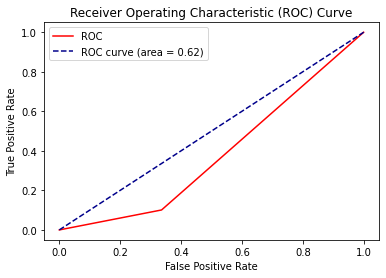

In [57]:
plt.plot(tpr,fpr,color='red',label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()